<a href="https://colab.research.google.com/github/AkhilBudati/machine-learning/blob/main/linearregressionmodel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

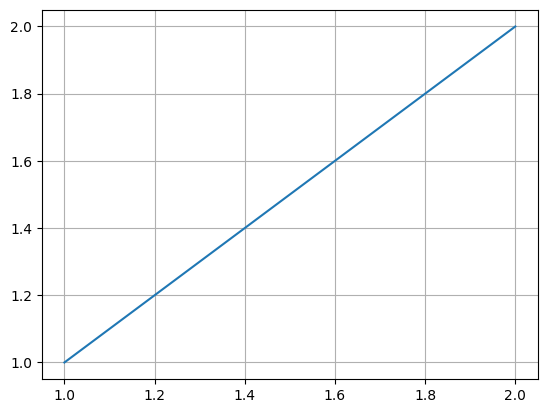

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xpoints=np.array([1,2])
ypoints=np.array([1,2])
plt.plot(xpoints,ypoints)
plt.grid()
plt.show()


In [ ]:
import torch
h=torch.tensor([3,2],dtype=torch.int32)
k=torch.tensor([3,2],dtype=torch.float64)
z=h*k
print(z)

tensor([9., 4.], dtype=torch.float64)


In [ ]:
import torch
data=[[1,2],[3,4]]
tensor_1=torch.tensor(data)
tensor_2=torch.ones(3,2)
tensor_3=torch.zeros(3,2,3)
tensor_4=torch.rand(4,2)
tensor_5=torch.ones_like(tensor_1)
tensor_6=torch.zeros_like(tensor_1)
tensor_7=torch.rand_like(tensor_1,dtype=torch.float)
print(tensor_1)
print(tensor_2)
print(tensor_3)
print(tensor_4)
print(tensor_5)
print(tensor_6)
print(tensor_7)

tensor([[1, 2],
        [3, 4]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
tensor([[0.3904, 0.6009],
        [0.2566, 0.7936],
        [0.9408, 0.1332],
        [0.9346, 0.5936]])
tensor([[1, 1],
        [1, 1]])
tensor([[0, 0],
        [0, 0]])
tensor([[0.8694, 0.5677],
        [0.7411, 0.4294]])


In [ ]:
import torch
tensor_1=torch.rand(3,4)
tensor_2=torch.ones_like(tensor_1)
tensor_3=tensor_1*tensor_2
tensor_4=torch.mm(tensor_1,tensor_2.T)
tensor_5=torch.cat([tensor_3,tensor_4],dim=1)
print(tensor_3)
print(tensor_4)
print(tensor_5)

tensor([[0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317],
        [0.1053, 0.2695, 0.3588, 0.1994]])
tensor([[2.3534, 2.3534, 2.3534],
        [1.8396, 1.8396, 1.8396],
        [0.9330, 0.9330, 0.9330]])
tensor([[0.8854, 0.5739, 0.2666, 0.6274, 2.3534, 2.3534, 2.3534],
        [0.2696, 0.4414, 0.2969, 0.8317, 1.8396, 1.8396, 1.8396],
        [0.1053, 0.2695, 0.3588, 0.1994, 0.9330, 0.9330, 0.9330]])


In [ ]:
import torch
tensor_1=torch.rand(3,4)
print(tensor_1)
print(tensor_1[0][0])
print(tensor_1[0])
print(tensor_1[:,0])
print(tensor_1[0:2:1])


tensor([[0.5472, 0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090],
        [0.5779, 0.9040, 0.5547, 0.3423]])
tensor(0.5472)
tensor([0.5472, 0.0062, 0.9516, 0.0753])
tensor([0.5472, 0.8860, 0.5779])
tensor([[0.5472, 0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090]])


**Creating a Parameter**

In [ ]:
import torch
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight*X+bias

X[:10],Y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(Y)

(50, 50)

In [ ]:
trainsplit=int(0.8*len(X))
X_train,Y_train=X[:trainsplit],Y[:trainsplit]
X_test,Y_test=X[trainsplit:],Y[trainsplit:]

In [ ]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14});

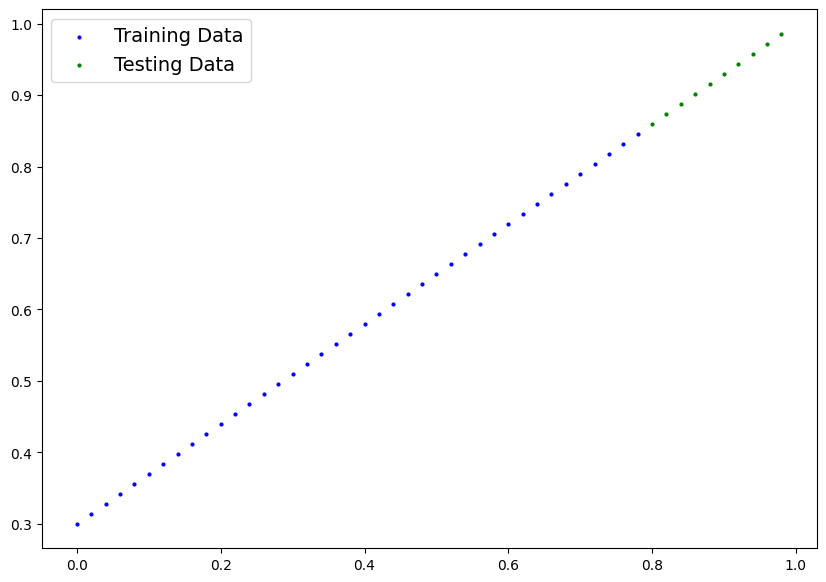

In [ ]:
plot_predictions();

**First Pytorch Model**

In [ ]:
import torch.nn as nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,x:torch.Tensor) ->torch.Tensor :
     return self.weights*x+self.bias

In [ ]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
#list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

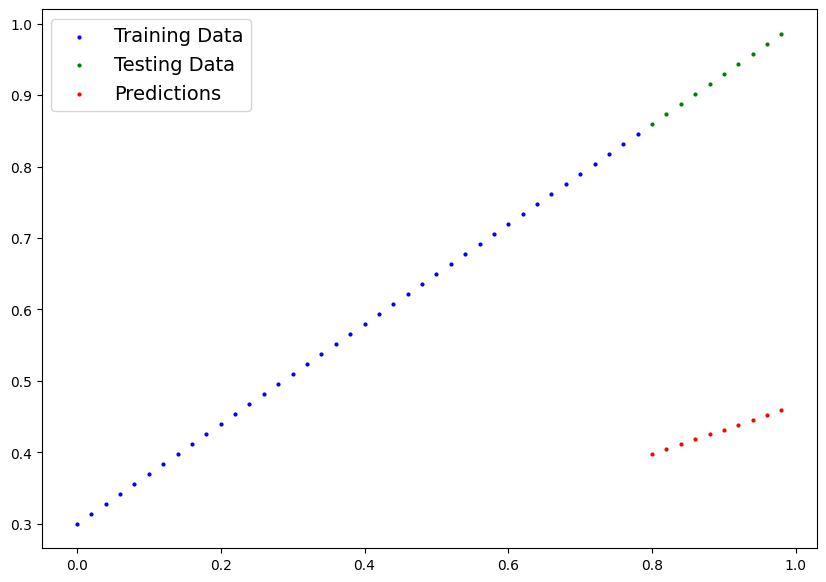

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#loss function
loss_fn=nn.L1Loss()

#optimiser
optimiser=torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [ ]:
epochs=200
epoch_count=[]
train_loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  #1.set model to training mode
  model_0.train()
  #2.forward pass
  y_pred=model_0(X_train)
  #3.calculate the loss
  loss=loss_fn(y_pred,Y_train)
  #4.optimiser zero grad
  optimiser.zero_grad()
  #5.perform baackpropagation on the loss with respect to the parameters
  loss.backward()
  #5.step the optmiser(perform gradient descent)
  optimiser.step()
  #testing
  model_0.eval()
  with torch.inference_mode():
    #1.do the forward pass
    test_pred=model_0(X_test)
    #2.calculate the loss
    test_loss=loss_fn(test_pred,Y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | loss : {loss} | Test Loss : {test_loss}")

Epoch : 0 | loss : 0.31288138031959534 | Test Loss : 0.48106518387794495
Epoch : 10 | loss : 0.1976713240146637 | Test Loss : 0.3463551998138428
Epoch : 20 | loss : 0.08908725529909134 | Test Loss : 0.21729660034179688
Epoch : 30 | loss : 0.053148526698350906 | Test Loss : 0.14464017748832703
Epoch : 40 | loss : 0.04543796554207802 | Test Loss : 0.11360953003168106
Epoch : 50 | loss : 0.04167863354086876 | Test Loss : 0.09919948130846024
Epoch : 60 | loss : 0.03818932920694351 | Test Loss : 0.08886633068323135
Epoch : 70 | loss : 0.03476089984178543 | Test Loss : 0.0805937647819519
Epoch : 80 | loss : 0.03132382780313492 | Test Loss : 0.07232122868299484
Epoch : 90 | loss : 0.02788739837706089 | Test Loss : 0.06473556160926819
Epoch : 100 | loss : 0.024458957836031914 | Test Loss : 0.05646304413676262
Epoch : 110 | loss : 0.021020207554101944 | Test Loss : 0.04819049686193466
Epoch : 120 | loss : 0.01758546568453312 | Test Loss : 0.04060482233762741
Epoch : 130 | loss : 0.0141553934663

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

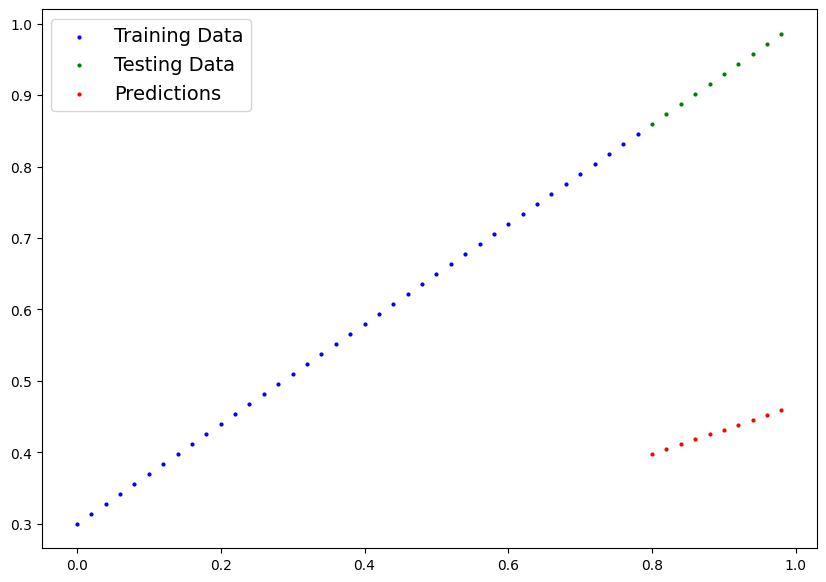

In [ ]:
plot_predictions(predictions=y_preds)

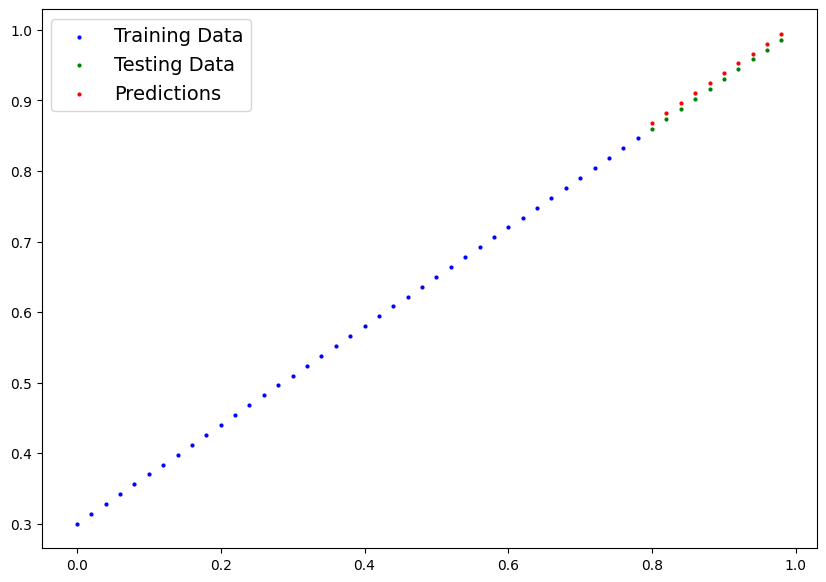

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

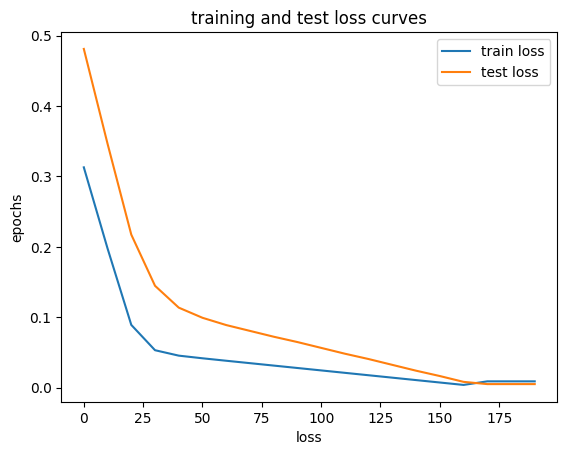

In [ ]:
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).numpy()),label="train loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label="test loss")
plt.title("training and test loss curves")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.legend();

In [ ]:
test_loss_values

[tensor(0.4811),
 tensor(0.3464),
 tensor(0.2173),
 tensor(0.1446),
 tensor(0.1136),
 tensor(0.0992),
 tensor(0.0889),
 tensor(0.0806),
 tensor(0.0723),
 tensor(0.0647),
 tensor(0.0565),
 tensor(0.0482),
 tensor(0.0406),
 tensor(0.0323),
 tensor(0.0241),
 tensor(0.0165),
 tensor(0.0082),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050)]

In [237]:
#saving
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="01linearregressionmodel1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


In [239]:
#loading
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [240]:
#making preds with loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])